In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
import pickle
with open('TrainData/train_data_prepr.pkl', 'rb') as f:
    train_data = pickle.load(f)

train_data.head()

,CustomerID,ReportedFraud,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,...,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,PolicyCombinedLimit,PolicySingleLimit
0,20065.0,N,2015-01-09,Multi-vehicle Collision,Rear Collision,Total Loss,Other,9,4,1404,...,58.0,471784,MALE,JD,sales,video-games,0.0,-42700.0,250.0,500.0
1,37589.0,N,2015-02-20,Single Vehicle Collision,Side Collision,Minor Damage,Ambulance,4,3,1675,...,34.0,431937,FEMALE,High School,transport-moving,polo,51300.0,0.0,100.0,300.0
2,24312.0,N,2015-01-14,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,5,2,1546,...,52.0,479320,FEMALE,PhD,machine-op-inspct,exercise,0.0,0.0,500.0,1000.0
3,5493.0,Y,2015-01-07,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,7,4,1413,...,25.0,607763,FEMALE,College,exec-managerial,exercise,47400.0,-56100.0,100.0,300.0
4,7704.0,Y,2015-02-26,Multi-vehicle Collision,Side Collision,Major Damage,Other,4,6,1367,...,27.0,441783,MALE,Masters,sales,chess,0.0,0.0,250.0,500.0


In [23]:
train_data.columns

Index(['CustomerID', 'ReportedFraud', 'DateOfIncident', 'TypeOfIncident',
       'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'IncidentAddress', 'IncidentTime',
       'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries', 'Witnesses',
       'PoliceReport', 'AmountOfTotalClaim', 'AmountOfInjuryClaim',
       'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'VehicleMake', 'VehicleModel', 'VehicleYOM', 'InsuredAge',
       'InsuredZipCode', 'InsuredGender', 'InsuredEducationLevel',
       'InsuredOccupation', 'InsuredHobbies', 'CapitalGains', 'CapitalLoss',
       'PolicyCombinedLimit', 'PolicySingleLimit'],
      dtype='object')

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CustomerID             28836 non-null  float64 
 1   ReportedFraud          28836 non-null  object  
 2   DateOfIncident         28836 non-null  category
 3   TypeOfIncident         28836 non-null  category
 4   TypeOfCollission       28836 non-null  category
 5   SeverityOfIncident     28836 non-null  category
 6   AuthoritiesContacted   28836 non-null  category
 7   IncidentState          28836 non-null  category
 8   IncidentCity           28836 non-null  category
 9   IncidentAddress        28836 non-null  category
 10  IncidentTime           28836 non-null  float64 
 11  NumberOfVehicles       28836 non-null  category
 12  PropertyDamage         28836 non-null  category
 13  BodilyInjuries         28836 non-null  category
 14  Witnesses              28836 non-null 

In [25]:
train_data['AmountOfTotalClaim'] = train_data['AmountOfTotalClaim'].astype(float)

In [30]:
cols = ['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted', 'NumberOfVehicles',
        'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
        'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
        'VehicleMake', 'VehicleModel', 'VehicleYOM', 'InsuredAge', 'InsuredGender', 'InsuredEducationLevel',
        'CapitalGains', 'CapitalLoss', 'PolicyCombinedLimit', 'PolicySingleLimit']


In [28]:
with open('TestData/test_data_prepr.pkl', 'rb') as f:
    test_data = pickle.load(f)

test_data.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,PolicyCombinedLimit,PolicySingleLimit
0,10008.0,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,5,2,1354,4.0,...,27.0,471704,FEMALE,High School,adm-clerical,base-jumping,56400.0,-57000.0,500.0,1000.0
1,10010.0,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,9,5,1383,16.0,...,40.0,455810,FEMALE,MD,prof-specialty,golf,56700.0,-65600.0,100.0,300.0
2,10015.0,2015-01-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,5,2,2030,20.0,...,39.0,461919,MALE,JD,other-service,movies,30400.0,0.0,250.0,500.0
3,10020.0,2015-01-03,Vehicle Theft,Rear Collision,Trivial Damage,None,7,5,1449,10.0,...,38.0,600904,FEMALE,Masters,exec-managerial,video-games,68500.0,0.0,500.0,500.0
4,1003.0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,5,2,1916,7.0,...,29.0,430632,FEMALE,PhD,sales,board-games,35100.0,0.0,100.0,300.0


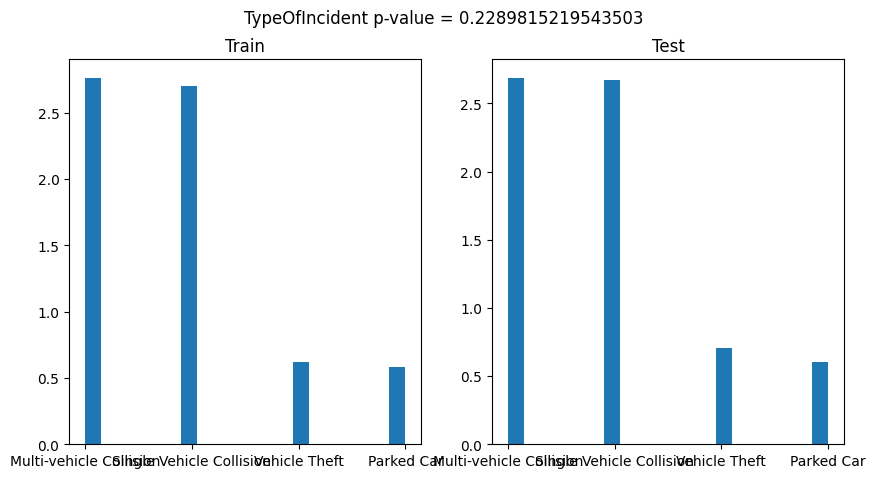

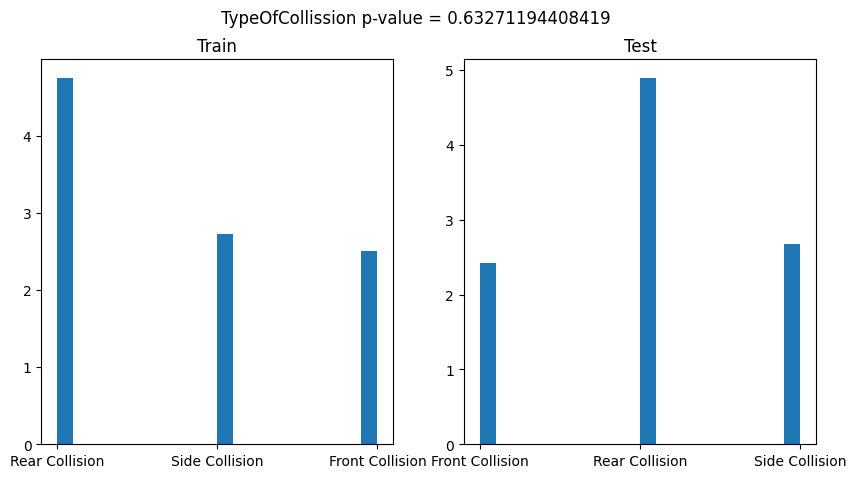

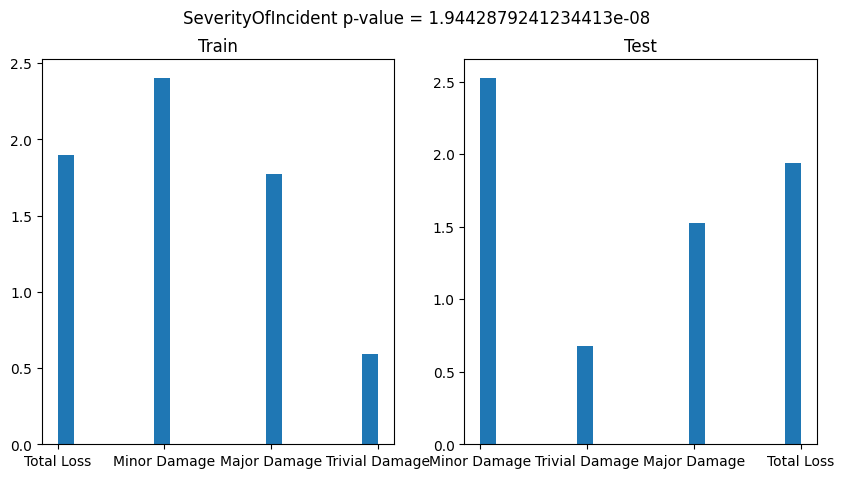

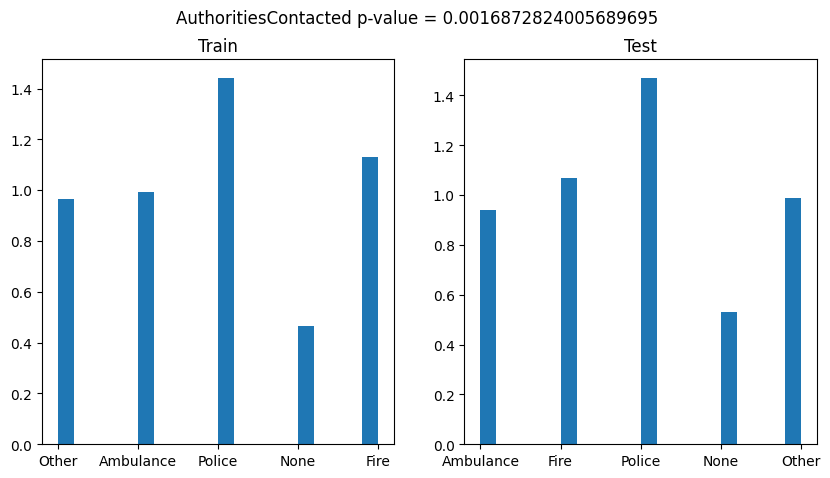

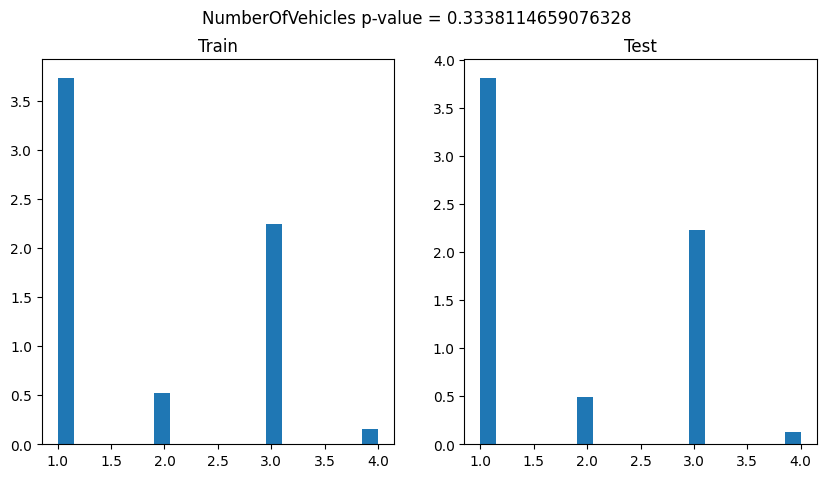

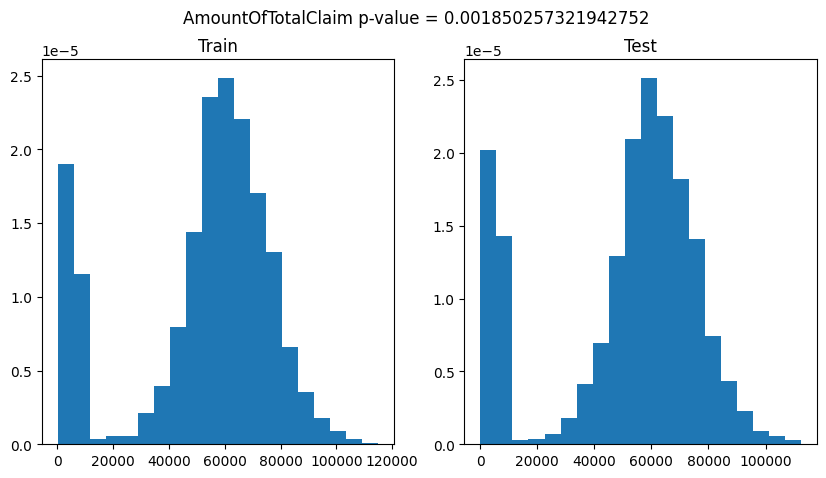

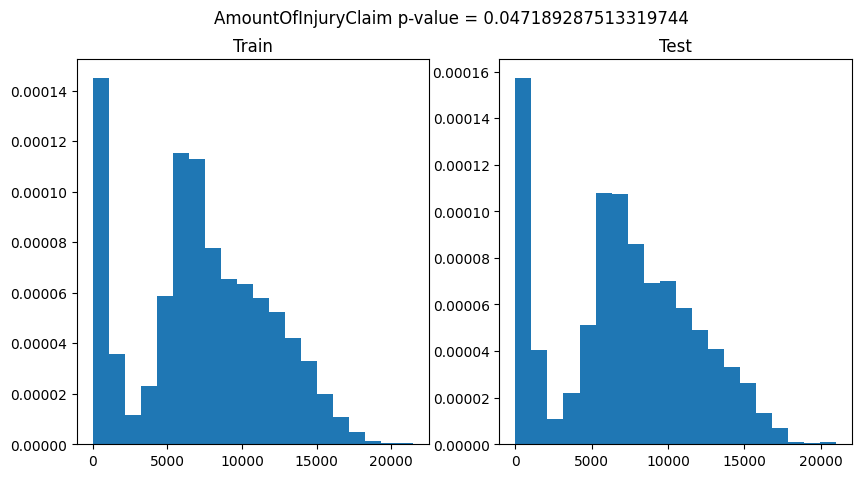

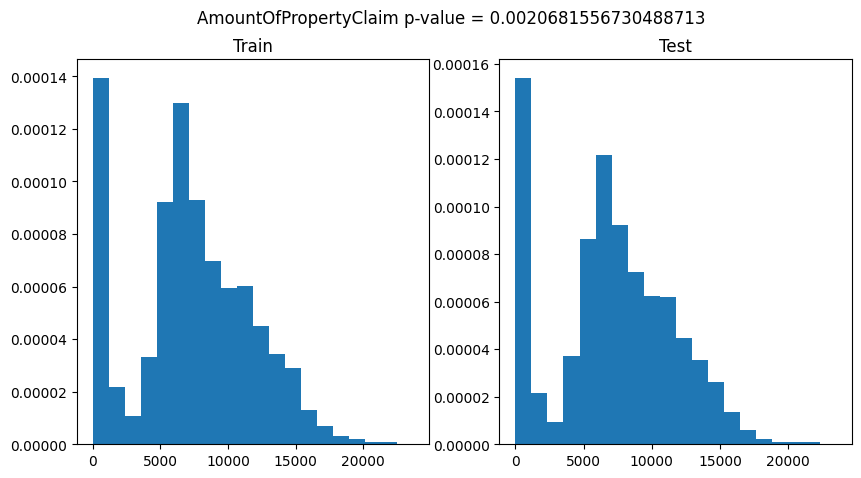

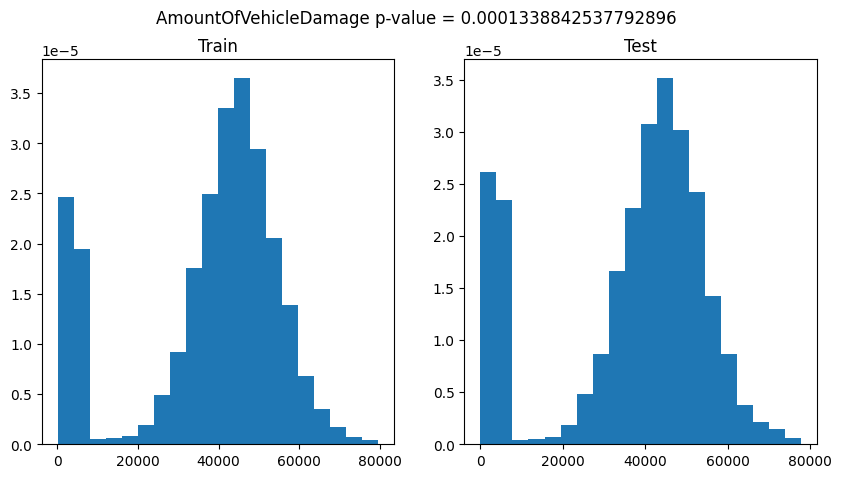

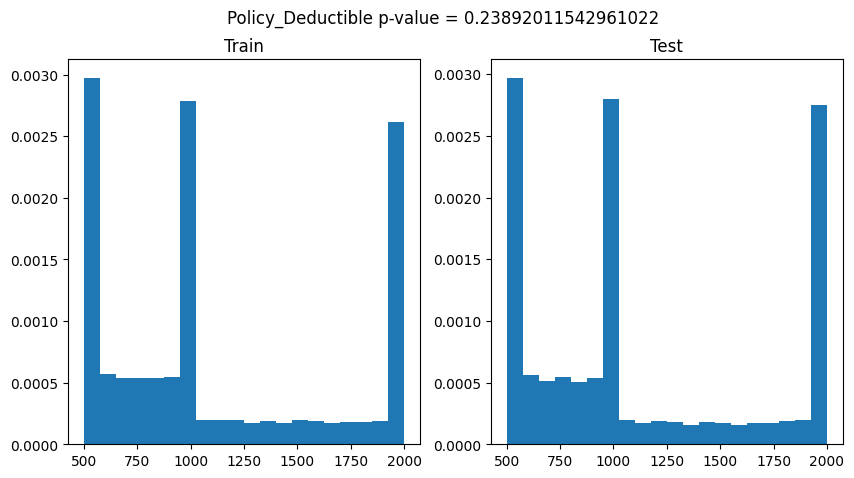

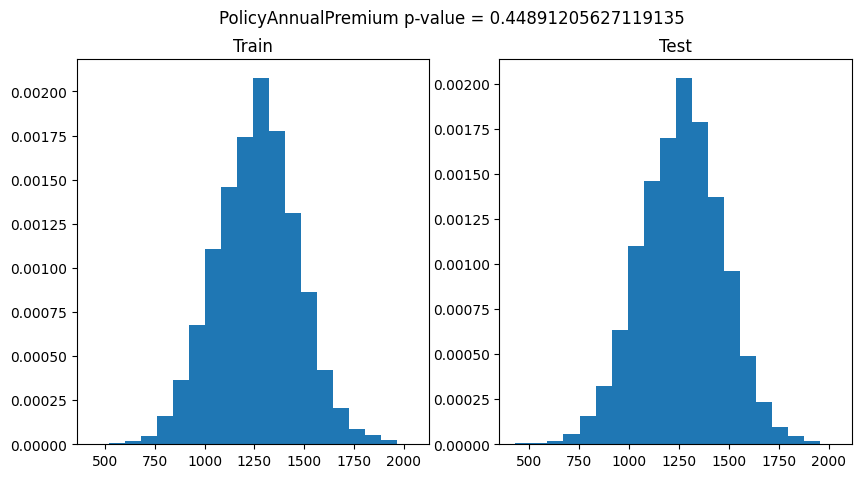

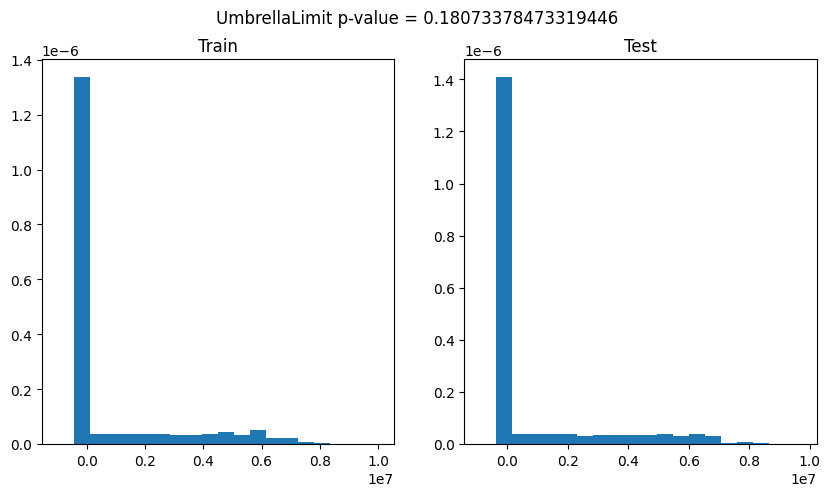

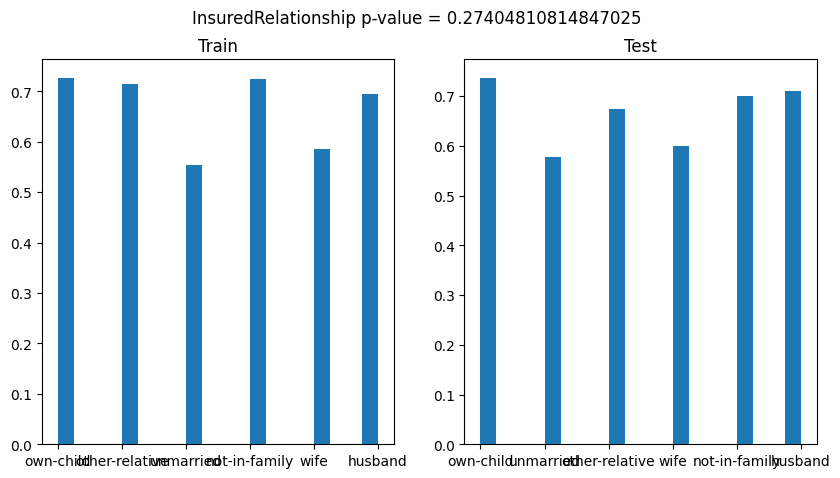

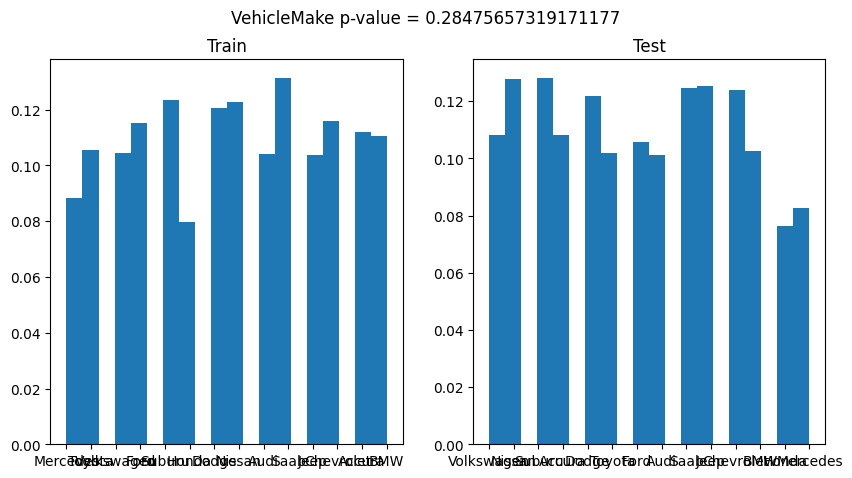

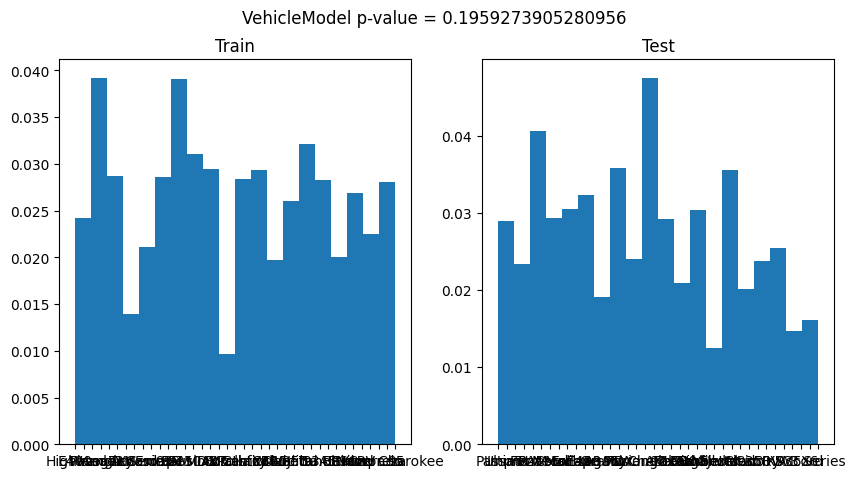

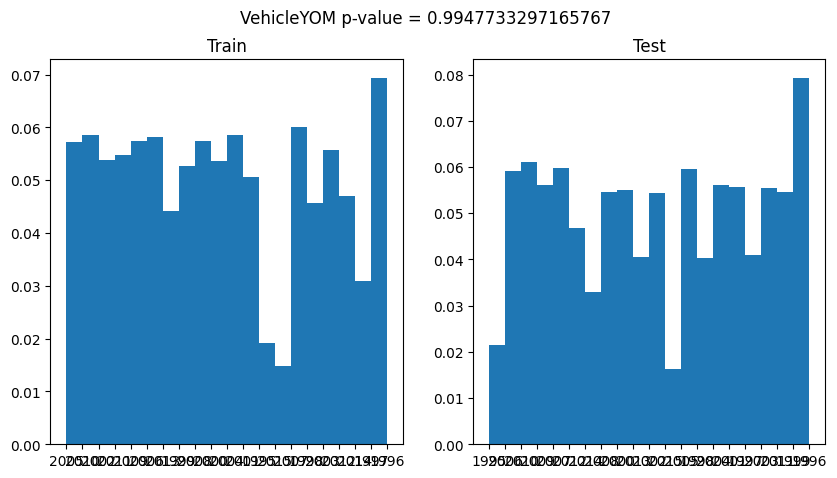

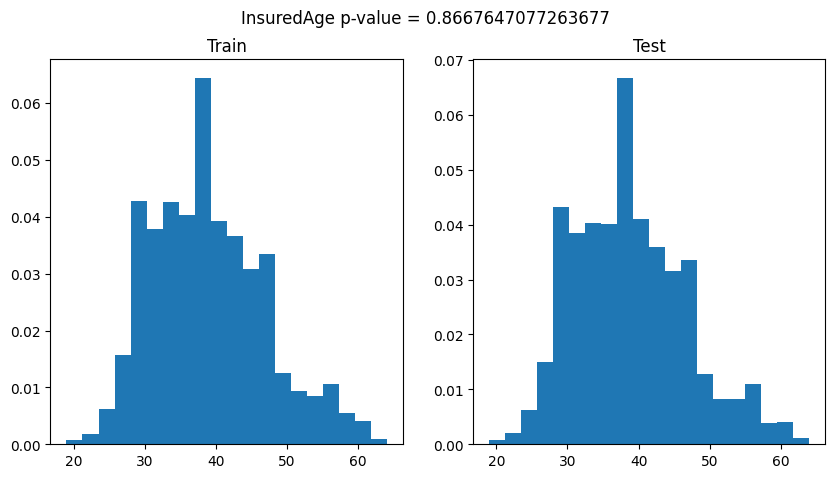

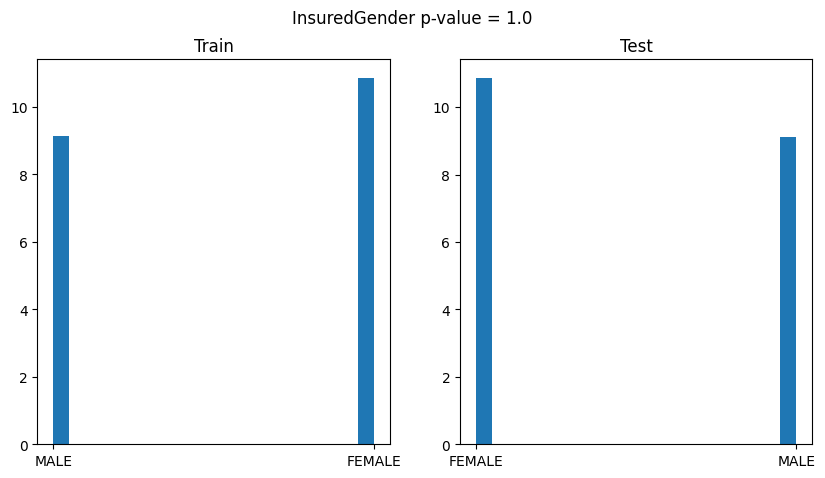

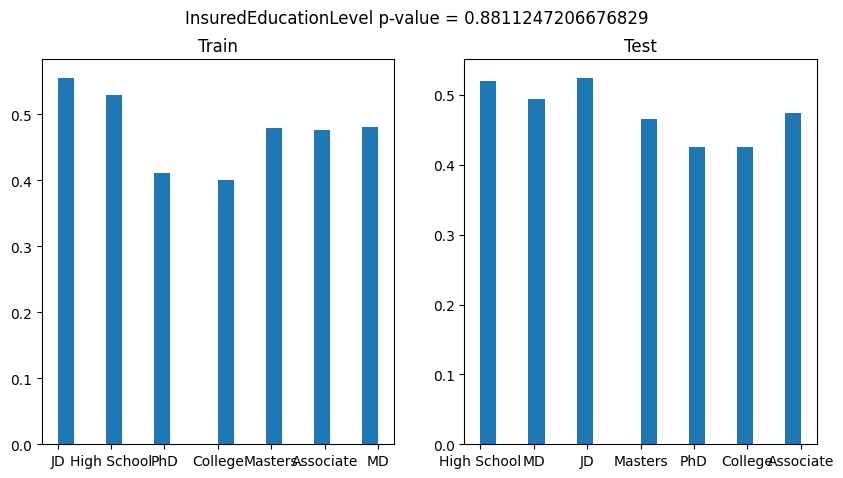

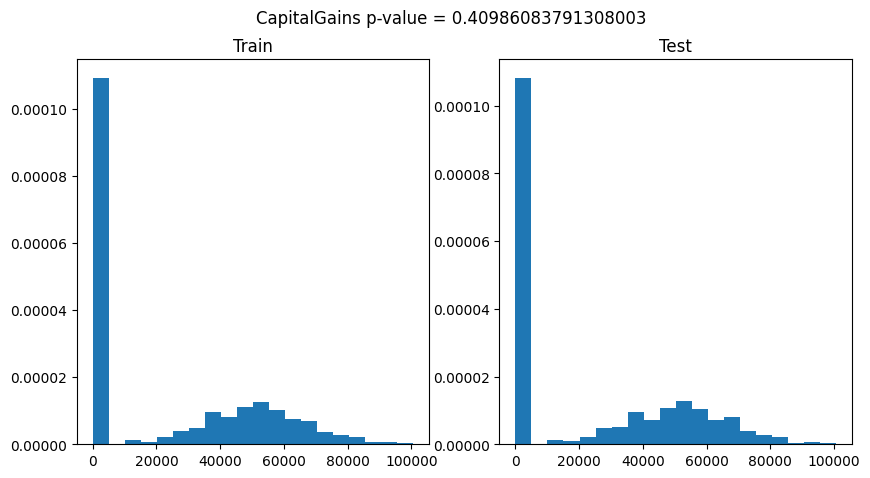

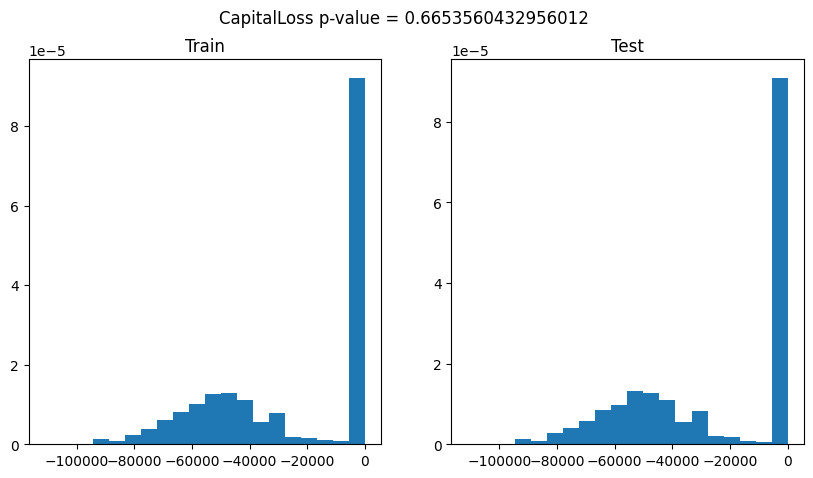

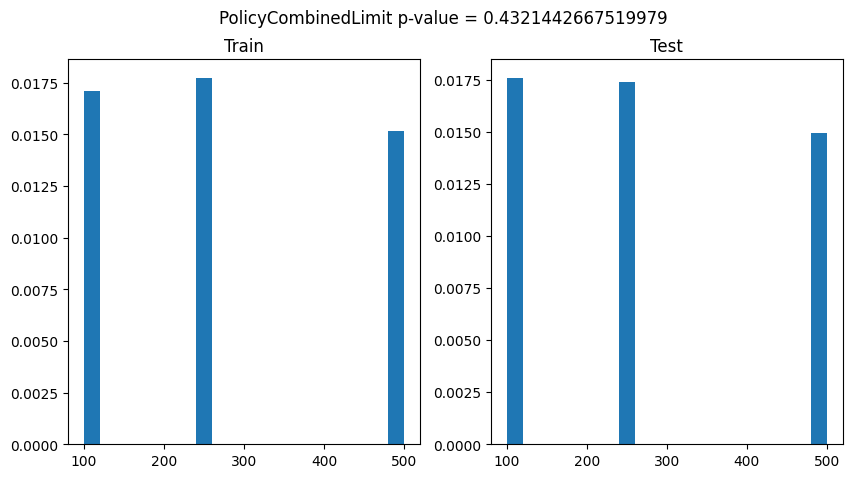

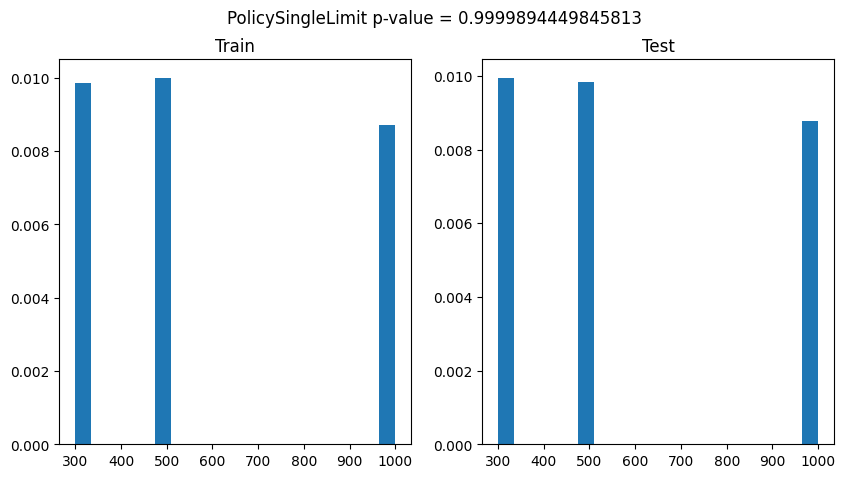

In [36]:
from scipy.stats import ks_2samp

for col in cols:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].hist(train_data[col], bins=20, density=True)
    ax[1].hist(test_data[col], bins=20, density=True)
    ax[0].set_title('Train')
    ax[1].set_title('Test')
    plt.suptitle(f'{col} p-value = {str(ks_2samp(train_data[col], test_data[col]).pvalue)}')
    plt.show()